# Image classification
In this notebook we are solving an image classification problem using Densly coupled neural net. 

The data we are goin to work with is the MNIST dataset which contains of 70000 numbers evenly distributed between 0-9.


In [4]:
import tensorflow as tf
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

### Load the dataset
And take a first look of the dataset by looking at the shape which gives us an idaea of the structure and size. We also show the dataset distribution.

Train data: (60000, 28, 28)
Test data: (10000, 28, 28)


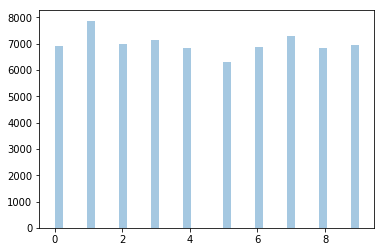

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train data:',np.shape(x_train))
print('Test data:', np.shape(x_test))

sns.distplot(np.append(y_train,y_test),kde=False)
plt.show()

# Look at the dataset
To get an idea of how the dataset. Some of the numbers are quite hard to classify even for the human eye. 

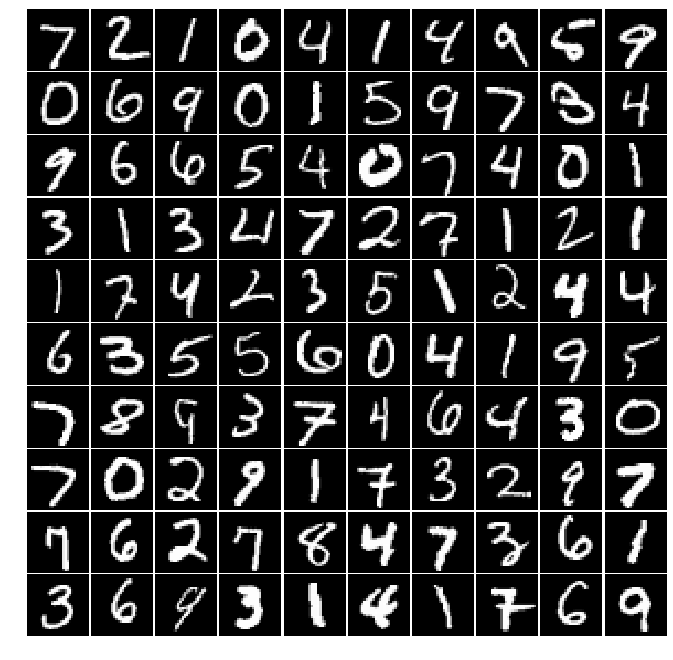

In [6]:
f,ax=plt.subplots(10,10,figsize=(10,10))
ax=ax.flatten()
for i in range(100):
    ax[i].imshow(x_test[i,:,:],cmap='gray')
[axi.set_axis_off() for axi in ax.ravel()]
plt.subplots_adjust(left=0.01, bottom=0.01, right=None, top=None, wspace=0.02, hspace=0.02)
plt.show()

In [7]:
# Scale the dataset to have values between 0 and 1
if np.max(x_train)>1:
    x_train = x_train / 255.0
    x_test = x_test / 255.0
else:
    print('Already scaled once')

In [8]:
x_train = x_train.reshape(-1,28, 28, 1)   #Reshape for CNN -  should work!!
x_test = x_test.reshape(-1,28, 28, 1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
# Creating a Sequential Model and adding the layers
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dropout(0.1))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','acc'])

history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=15,batch_size=256)
model.evaluate(x_test, y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 9472/60000 [===>..........................] - ETA: 14s - loss: 0.8128 - accuracy: 0.7797 - acc: 0.7797

KeyboardInterrupt: 

# Evaluate the result
Oen way to evaluate the result is throug the confusion matrix. In the matrix below we cans see that twos that are predicted as something else is more likely to be predicted as a 7.

In [ ]:
output = model.predict_classes(x_test, verbose=1, batch_size=512)
conf_mat = confusion_matrix(y_test.flatten(), output)
plt.table(cellText=conf_mat,
                      #rowLabels=rows,
                      #rowColours=colors,
                      #colLabels=columns,
                      loc='center')
plt.axis('off')

In [ ]:
print(np.shape(x_test))
for i in range(np.shape(output)[0]):
    #print(i)
    if output[i]!=y_test[i]:
        plt.title(str(y_test[i]) + ' predicted as ' + str(output[i]))
        plt.imshow(x_test[i,:,:,0], cmap='gray')
        plt.axis('off')
        plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, output))

In [34]:
def my_init(shape, dtype=None):
    # Note it must take arguments 'shape' and 'dtype'.
    # vertical edges
    f1 = np.array([[[0],[0],[0]],
              [[-1],[1],[0]],
              [[0],[0],[0]]])
    # horizontal edges
    f2 = np.array([[[0],[-1],[0]],
                  [[0],[1],[0]],
                  [[0],[0],[0]]])
    # edges all directions
    f3 = np.array([[[-1],[-1],[-1]],
                  [[-1],[8],[-1]],
                  [[-1],[-1],[-1]]])
    # 
    f4 = np.array([[[0],[-1],[0]],
                  [[1],[0],[0]],
                  [[0],[0],[0]]])
    f5 = np.array([[[0],[1],[0]],
                  [[0],[0],[-1]],
                  [[0],[0],[0]]])

    f6 = np.array([[[-1],[0],[1]],
                  [[0],[0],[0]],
                  [[1],[0],[-1]]])
    
    f7 = np.array([[[-1],[0],[0]],
                  [[0],[2],[0]],
                  [[0],[0],[-1]]])
    
    f8 = np.array([[[0],[0],[-1]],
                  [[0],[2],[0]],
                  [[-1],[0],[0]]])
    f9 = np.array([[[0],[0],[0]],
                  [[-1],[2],[-1]],
                  [[0],[0],[0]]])
    
    f10 = np.array([[[0],[-1],[0]],
                  [[0],[2],[0]],
                  [[0],[-1],[0]]])
    # sharpening
    f11 = np.array([[[-1],[-1],[-1]],
                  [[-1],[9],[-1]],
                  [[-1],[-1],[-1]]])
    # sharpening
    f12 = np.array([[[1],[1],[1]],
                  [[1],[-7],[1]],
                  [[1],[1],[1]]])
    # emboss
    f13 = np.array([[[-1],[-1],[0]],
                  [[-1],[0],[1]],
                  [[0],[1],[1]]])
    
    a=np.stack((f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13), axis=-1)
    b=a
    if np.shape(a)[2]!=shape[2]:
        for i in range(shape[2]-1):
            b=np.concatenate((b,a), axis=2)
        a=b
    return a

def my_dig_filter(shape, dtype=None):
    # Ones
    f1 = np.array([[[0],[1],[0]],
                   [[0],[1],[0]],
                   [[0],[1],[0]]])
    
    f2 = np.array([[[0],[1],[0]],
                   [[0],[1],[0]],
                   [[0],[0],[0]]])
    
    f3 = np.array([[[1],[1],[1]],
                   [[1],[1],[1]],
                   [[1],[1],[1]]])
    
    f4 = np.array([[[0],[0],[0]],
                   [[0],[1],[0]],
                   [[0],[1],[0]]])
    
    f5 = np.array([[[0],[1],[0]],
                   [[1],[1],[0]],
                   [[0],[1],[0]]])
    
    f6 = np.array([[[0],[0],[1]],
                   [[0],[1],[1]],
                   [[1],[1],[0]]])
    
    f7 = np.array([[[0],[1],[0]],
                   [[1],[1],[1]],
                   [[0],[0],[0]]])
    
    f8 = np.array([[[1],[1],[0]],
                   [[1],[1],[0]],
                   [[1],[1],[0]]])
    
    f9 = np.array([[[0],[1],[1]],
                   [[0],[1],[1]],
                   [[0],[1],[1]]])
    # Twos
    f11 = np.array([[[1],[1],[1]],
                   [[0],[1],[0]],
                   [[1],[0],[0]]])
    
    f12 = np.array([[[0],[0],[0]],
                   [[1],[1],[1]],
                   [[0],[0],[0]]])
    
    
    f13 = np.array([[[0],[0],[0]],
                   [[1],[1],[0]],
                   [[0],[0],[0]]])
    
    f14 = np.array([[[0],[0],[0]],
                   [[0],[1],[1]],
                   [[0],[0],[0]]])
    
    f15 = np.array([[[0],[0],[1]],
                   [[1],[1],[0]],
                   [[1],[1],[1]]])
    
    f16 = np.array([[[0],[1],[1]],
                   [[1],[0],[0]],
                   [[0],[0],[0]]])
    
    f17 = np.array([[[1],[1],[0]],
                   [[0],[0],[1]],
                   [[0],[0],[0]]])
    
    f18 = np.array([[[0],[1],[1]],
                   [[1],[0],[0]],
                   [[0],[0],[0]]])
    
    f19 = np.array([[[0],[0],[0]],
                   [[0],[0],[0]],
                   [[1],[1],[1]]])
    #Threes
    f20 = np.array([[[0],[0],[1]],
                   [[0],[1],[0]],
                   [[0],[0],[1]]])
    
    f21 = np.array([[[0],[0],[0]],
                   [[0],[0],[1]],
                   [[1],[1],[0]]])
    
    f22 = np.array([[[0],[1],[0]],
                   [[0],[0],[1]],
                   [[0],[0],[1]]])
    
    f23 = np.array([[[0],[0],[1]],
                   [[0],[0],[1]],
                   [[0],[1],[0]]])
    
    f24 = np.array([[[0],[0],[0]],
                   [[1],[0],[0]],
                   [[0],[1],[1]]])
    
    f25 = np.array([[[0],[0],[1]],
                   [[1],[1],[0]],
                   [[0],[0],[1]]])
    
    f26 = np.array([[[0],[1],[1]],
                   [[1],[0],[0]],
                   [[0],[0],[0]]])
    
    f27 = np.array([[[0],[0],[0]],
                   [[1],[0],[0]],
                   [[0],[1],[1]]])
    
    f28 = np.array([[[0],[0],[0]],
                   [[0],[1],[0]],
                   [[0],[0],[1]]])
    #Fours
    f29 = np.array([[[0],[0],[1]],
                   [[0],[1],[1]],
                   [[1],[1],[1]]])
    
    f30 = np.array([[[0],[1],[0]],
                   [[1],[1],[1]],
                   [[0],[1],[0]]])
    
    f31 = np.array([[[1],[1],[1]],
                   [[1],[0],[0]],
                   [[1],[0],[0]]])
    
    f32 = np.array([[[0],[0],[1]],
                   [[0],[1],[0]],
                   [[1],[0],[0]]])
    
    
    f33 = np.array([[[0],[1],[0]],
                   [[1],[1],[0]],
                   [[0],[1],[0]]])
    #Fives
    f34 = np.array([[[1],[1],[1]],
                   [[0],[0],[1]],
                   [[1],[1],[1]]])
    
    f35 = np.array([[[1],[1],[1]],
                   [[0],[0],[1]],
                   [[0],[0],[1]]])
    
    f36 = np.array([[[1],[1],[1]],
                   [[1],[0],[0]],
                   [[1],[1],[1]]])
    #sixes
    f37 = np.array([[[0],[1],[0]],
                   [[1],[0],[1]],
                   [[0],[1],[0]]])
    
    f38 = np.array([[[1],[1],[1]],
                   [[1],[0],[1]],
                   [[1],[1],[1]]])
    
    f39 = np.array([[[0],[1],[1]],
                   [[1],[0],[1]],
                   [[1],[1],[1]]])
    
    f40 = np.array([[[0],[1],[1]],
                   [[1],[0],[0]],
                   [[1],[1],[0]]])
    # Sevens
    f41 = np.array([[[0],[0],[1]],
                   [[0],[1],[0]],
                   [[0],[0],[0]]])
    
    f42 = np.array([[[0],[0],[1]],
                   [[1],[1],[1]],
                   [[1],[0],[0]]])
    
    f43 = np.array([[[0],[0],[0]],
                   [[0],[0],[1]],
                   [[0],[1],[0]]])
    
    
    f44 = np.array([[[0],[0],[0]],
                   [[1],[1],[1]],
                   [[0],[1],[0]]])
    #eights
    f45 = np.array([[[1],[0],[1]],
                   [[0],[1],[0]],
                   [[1],[0],[1]]])
    
    f46 = np.array([[[0],[0],[0]],
                   [[1],[1],[0]],
                   [[0],[0],[1]]])
    
    f47 = np.array([[[0],[0],[0]],
                   [[1],[1],[0]],
                   [[0],[0],[1]]])
    
    f48 = np.array([[[0],[0],[0]],
                   [[1],[1],[0]],
                   [[0],[0],[1]]])
    
    f49 = np.array([[[1],[1],[1]],
                   [[0],[0],[0]],
                   [[0],[0],[0]]])
    #nines
    f50 = np.array([[[1],[1],[0]],
                   [[0],[0],[1]],
                   [[1],[1],[0]]])
    
    f51 = np.array([[[0],[1],[0]],
                   [[0],[1],[0]],
                   [[1],[0],[0]]])

    a=np.stack((f1, f2, f3, f4, f5, f6, f7, f8, f9, f11, f12, f13, f14, f15, f16, f17, f18, f19, f20, f21, f22, f23, f24, f25, f26, f27, f28, f29, f30, f31, f32, f33, f34, f35, f36, f37, f38, f39, f40, f41, f42, f43, f44, f45, f46, f47, f48, f49, f50, f51), axis=-1)
    b=a
    if np.shape(a)[2]!=shape[2]:
        for i in range(shape[2]-1):
            b=np.concatenate((b,a), axis=2)
        a=b
    return a*2-1


In [35]:
s=''
for i in range(52):
   s+='f'+str(i)+', '
print(s)

f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18, f19, f20, f21, f22, f23, f24, f25, f26, f27, f28, f29, f30, f31, f32, f33, f34, f35, f36, f37, f38, f39, f40, f41, f42, f43, f44, f45, f46, f47, f48, f49, f50, f51, 


Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 19s 315us/sample - loss: 3.4634 - accuracy: 0.2893 - acc: 0.2893 - val_loss: 1.5455 - val_accuracy: 0.4460 - val_acc: 0.4460
Epoch 2/150
60000/60000 [==============================] - 20s 329us/sample - loss: 1.7414 - accuracy: 0.3830 - acc: 0.3830 - val_loss: 1.2822 - val_accuracy: 0.5682 - val_acc: 0.5682
Epoch 3/150
60000/60000 [==============================] - 19s 310us/sample - loss: 1.5485 - accuracy: 0.4695 - acc: 0.4695 - val_loss: 1.0277 - val_accuracy: 0.6647 - val_acc: 0.6647
Epoch 4/150
60000/60000 [==============================] - 19s 311us/sample - loss: 1.3884 - accuracy: 0.5236 - acc: 0.5236 - val_loss: 0.8709 - val_accuracy: 0.7448 - val_acc: 0.7448
Epoch 5/150
60000/60000 [==============================] - 20s 330us/sample - loss: 1.2769 - accuracy: 0.5612 - acc: 0.5612 - val_loss: 0.7591 - val_accuracy: 0.7833 - val_acc: 0.7833
Epoch 6/150
60000/60000 [=====

60000/60000 [==============================] - 22s 370us/sample - loss: 0.4033 - accuracy: 0.8787 - acc: 0.8787 - val_loss: 0.1546 - val_accuracy: 0.9588 - val_acc: 0.9588
Epoch 46/150
60000/60000 [==============================] - 22s 364us/sample - loss: 0.3875 - accuracy: 0.8827 - acc: 0.8827 - val_loss: 0.1381 - val_accuracy: 0.9643 - val_acc: 0.9643
Epoch 47/150
60000/60000 [==============================] - 21s 352us/sample - loss: 0.3776 - accuracy: 0.8863 - acc: 0.8863 - val_loss: 0.1370 - val_accuracy: 0.9635 - val_acc: 0.9635
Epoch 48/150
60000/60000 [==============================] - 21s 354us/sample - loss: 0.3706 - accuracy: 0.8913 - acc: 0.8913 - val_loss: 0.1343 - val_accuracy: 0.9668 - val_acc: 0.9668
Epoch 49/150
60000/60000 [==============================] - 22s 371us/sample - loss: 0.3612 - accuracy: 0.8927 - acc: 0.8927 - val_loss: 0.1243 - val_accuracy: 0.9661 - val_acc: 0.9661
Epoch 50/150
60000/60000 [==============================] - 21s 348us/sample - loss: 0.3

60000/60000 [==============================] - 21s 353us/sample - loss: 0.2023 - accuracy: 0.9429 - acc: 0.9429 - val_loss: 0.0698 - val_accuracy: 0.9797 - val_acc: 0.9797
Epoch 90/150
60000/60000 [==============================] - 21s 347us/sample - loss: 0.2024 - accuracy: 0.9442 - acc: 0.9442 - val_loss: 0.0781 - val_accuracy: 0.9788 - val_acc: 0.9788
Epoch 91/150
60000/60000 [==============================] - 26s 439us/sample - loss: 0.1954 - accuracy: 0.9451 - acc: 0.9451 - val_loss: 0.0756 - val_accuracy: 0.9791 - val_acc: 0.9791
Epoch 92/150
60000/60000 [==============================] - 26s 435us/sample - loss: 0.2029 - accuracy: 0.9433 - acc: 0.9433 - val_loss: 0.0799 - val_accuracy: 0.9771 - val_acc: 0.9771
Epoch 93/150
60000/60000 [==============================] - 26s 441us/sample - loss: 0.1949 - accuracy: 0.9455 - acc: 0.9455 - val_loss: 0.0781 - val_accuracy: 0.9791 - val_acc: 0.9791
Epoch 94/150
60000/60000 [==============================] - 26s 437us/sample - loss: 0.1

60000/60000 [==============================] - 24s 397us/sample - loss: 0.1406 - accuracy: 0.9603 - acc: 0.9603 - val_loss: 0.0614 - val_accuracy: 0.9824 - val_acc: 0.9824
Epoch 134/150
60000/60000 [==============================] - 24s 397us/sample - loss: 0.1417 - accuracy: 0.9602 - acc: 0.9602 - val_loss: 0.0604 - val_accuracy: 0.9836 - val_acc: 0.9836
Epoch 135/150
60000/60000 [==============================] - 25s 415us/sample - loss: 0.1427 - accuracy: 0.9594 - acc: 0.9594 - val_loss: 0.0574 - val_accuracy: 0.9846 - val_acc: 0.9846
Epoch 136/150
60000/60000 [==============================] - 24s 407us/sample - loss: 0.1390 - accuracy: 0.9607 - acc: 0.9607 - val_loss: 0.0579 - val_accuracy: 0.9843 - val_acc: 0.9843
Epoch 137/150
60000/60000 [==============================] - 24s 398us/sample - loss: 0.1376 - accuracy: 0.9612 - acc: 0.9612 - val_loss: 0.0619 - val_accuracy: 0.9830 - val_acc: 0.9830
Epoch 138/150
60000/60000 [==============================] - 24s 397us/sample - loss

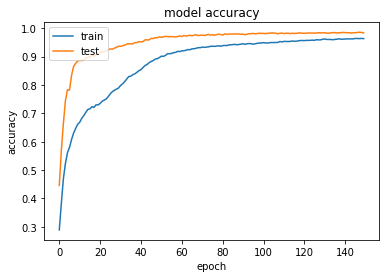

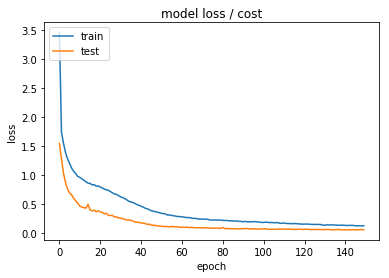

10000/10000 [==============================] - 1s 89us/sample
              precision    recall  f1-score   support

           0      0.987     0.993     0.990       980
           1      0.994     0.992     0.993      1135
           2      0.985     0.984     0.985      1032
           3      0.983     0.983     0.983      1010
           4      0.990     0.986     0.988       982
           5      0.991     0.972     0.981       892
           6      0.982     0.981     0.982       958
           7      0.989     0.978     0.983      1028
           8      0.957     0.988     0.972       974
           9      0.977     0.977     0.977      1009

    accuracy                          0.984     10000
   macro avg      0.984     0.983     0.983     10000
weighted avg      0.984     0.984     0.984     10000



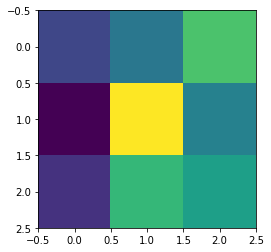

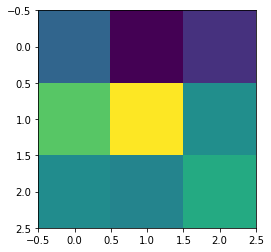

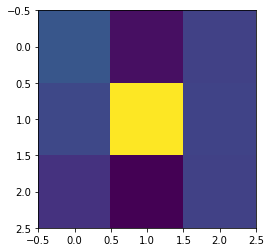

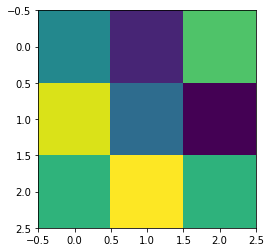

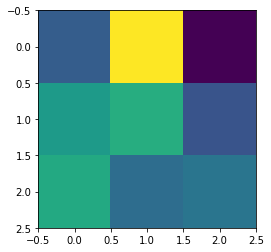

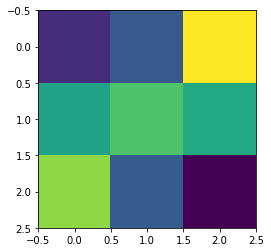

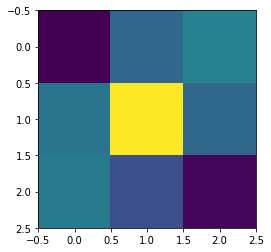

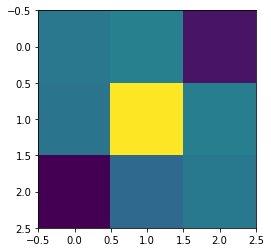

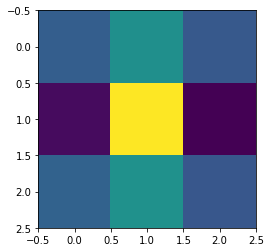

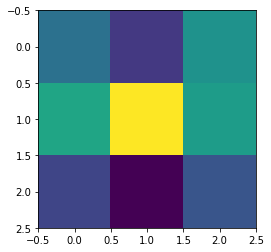

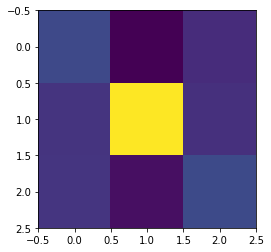

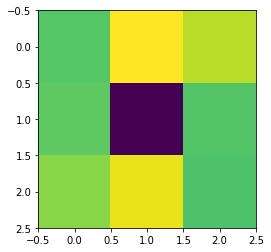

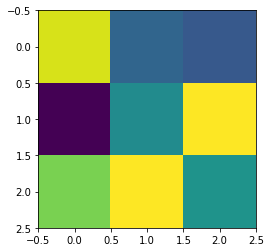

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,MaxPool2D, BatchNormalization

# Creating a Sequential Model and adding the layers


    #print('initiated',shape)
    #return np.array([[0,0,0],[-1,1,0],[0,0,0]])
#mymodel?+
input_shape = (28, 28, 1)
mymodel2=0
mymodel2 = Sequential()
mymodel2.add(Conv2D(13, kernel_size=(3,3), input_shape=input_shape, kernel_initializer=my_init))  # replace '...' with your args

mymodel2.add(MaxPooling2D(pool_size=(2, 2)))
mymodel2.add(Dropout(0.4))
mymodel2.add(Conv2D(50, kernel_size=(3,3), kernel_initializer=my_dig_filter))
#mymodel.add(Conv2D(20, kernel_size=(3,3)))#, kernel_initializer=my_init))  # replace '...' with your args

#mymodel.add(MaxPooling2D(pool_size=(2, 2)))
#mymodel2.add(Conv2D(26, kernel_size=(3,3)))#, kernel_initializer=my_init))
#mymodel2.add(MaxPool2D())
#mymodel2.add(Dropout(0.4))
mymodel2.add(Flatten()) # Flattening the 2D arrays for fully connected layers
mymodel2.add(Dropout(0.4))
mymodel2.add(Dense(128, activation=tf.nn.relu))
mymodel2.add(Dropout(0.4))
mymodel2.add(Dense(10,activation=tf.nn.softmax))
#mymodel.layers[0].trainable=False

mymodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','acc'])

history2=mymodel2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=256)
mymodel2.evaluate(x_test, y_test)

#history=mymodel.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=15,batch_size=256)
#mymodel.evaluate(x_test, y_test)
# summarize history for accuracy

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss / cost')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import classification_report
output2 = mymodel2.predict_classes(x_test, verbose=1, batch_size=512)
print(classification_report(y_test, output2,digits=3))
for i in range(13):
    plt.imshow(mymodel2.layers[0].get_weights()[0][:,:,0,i])
    plt.show()

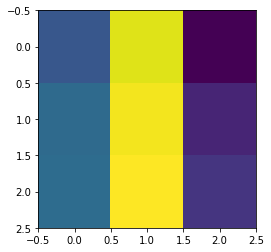

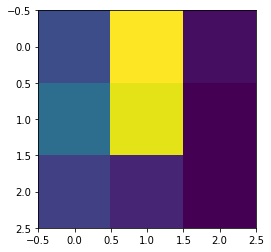

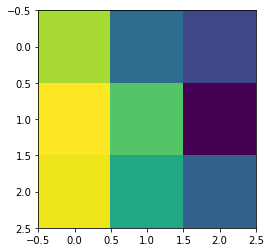

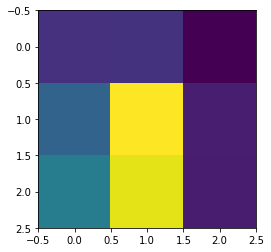

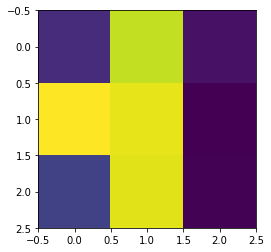

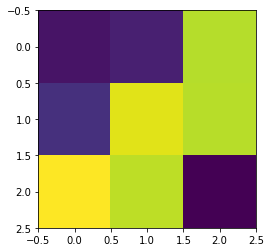

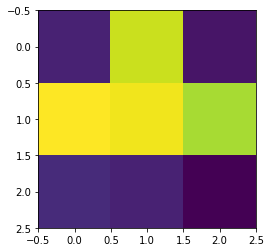

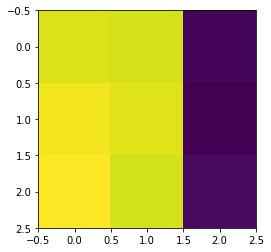

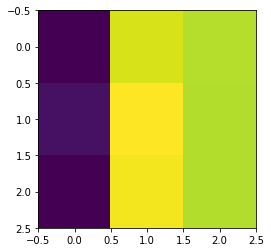

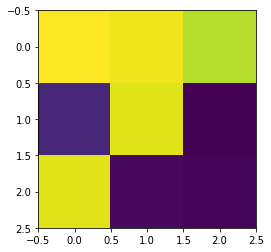

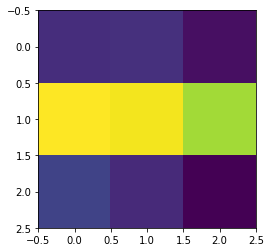

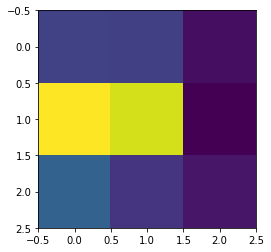

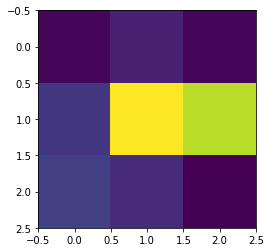

In [30]:
#mymodel2.layers[3]
for i in range(13):#    
    plt.imshow(mymodel2.layers[3].get_weights()[0][:,:,0,i])
    plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,MaxPool2D, BatchNormalization

# Creating a Sequential Model and adding the layers

def my_init(shape, dtype=None):
    # Note it must take arguments 'shape' and 'dtype'.
    # vertical edges
    print(shape)
    f1 = np.array([[[0],[0],[0]],
              [[-1],[1],[0]],
              [[0],[0],[0]]])
    # horizontal edges
    f2 = np.array([[[0],[-1],[0]],
                  [[0],[1],[0]],
                  [[0],[0],[0]]])
    # edges all directions
    f3 = np.array([[[-1],[-1],[-1]],
                  [[-1],[8],[-1]],
                  [[-1],[-1],[-1]]])
    # 
    f4 = np.array([[[0],[-1],[0]],
                  [[1],[0],[0]],
                  [[0],[0],[0]]])
    f5 = np.array([[[0],[1],[0]],
                  [[0],[0],[-1]],
                  [[0],[0],[0]]])

    f6 = np.array([[[-1],[0],[1]],
                  [[0],[0],[0]],
                  [[1],[0],[-1]]])
    f7 = np.array([[[-1],[0],[0]],
                  [[0],[2],[0]],
                  [[0],[0],[-1]]])
    f8 = np.array([[[0],[0],[-1]],
                  [[0],[2],[0]],
                  [[-1],[0],[0]]])
    f9 = np.array([[[0],[0],[0]],
                  [[-1],[2],[-1]],
                  [[0],[0],[0]]])
    
    f10 = np.array([[[0],[-1],[0]],
                  [[0],[2],[0]],
                  [[0],[-1],[0]]])
    # sharpening
    f11 = np.array([[[-1],[-1],[-1]],
                  [[-1],[9],[-1]],
                  [[-1],[-1],[-1]]])
    # sharpening
    f12 = np.array([[[1],[1],[1]],
                  [[1],[-7],[1]],
                  [[1],[1],[1]]])
    # emboss
    f13 = np.array([[[-1],[-1],[0]],
                  [[-1],[0],[1]],
                  [[0],[1],[1]]])
    # 
    
    a=np.stack((f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13), axis=-1)
    b=a
    if np.shape(a)[2]!=shape[2]:
        #b=np.zeros(shape)
        print(np.shape(b))
        print(shape)
        for i in range(shape[2]-1):
            
            b=np.concatenate((b,a), axis=2)
            #b[:,:,i,:]=a#np.stack((a,a),axis=2)
            #print(np.shape(a))
        
        print(np.shape(b))
        #print(b)
        
        a=b*2-1
        
        
    
    return a
    #print('initiated',shape)
    #return np.array([[0,0,0],[-1,1,0],[0,0,0]])
#mymodel?+
input_shape = (28, 28, 1)
mymodel2=0
mymodel2 = Sequential()
#mymodel.add(Conv2D(4, kernel_size=(3,3), input_shape=input_shape))
mymodel2.add(Conv2D(13, kernel_size=(3,3), input_shape=input_shape, kernel_initializer=my_init))  # replace '...' with your args
#mymodel.add(Conv2D(13, kernel_size=(3,3), kernel_initializer=my_init))  # replace '...' with your args
mymodel2.add(MaxPooling2D(pool_size=(2, 2)))
mymodel2.add(Dropout(0.4))
#mymodel.add(Conv2D(13, kernel_size=(3,3), kernel_initializer=my_init))
#mymodel.add(Conv2D(20, kernel_size=(3,3)))#, kernel_initializer=my_init))  # replace '...' with your args

#mymodel.add(MaxPooling2D(pool_size=(2, 2)))
#mymodel2.add(Conv2D(26, kernel_size=(3,3)))#, kernel_initializer=my_init))
#mymodel2.add(MaxPool2D())
#mymodel2.add(Dropout(0.4))
mymodel2.add(Flatten()) # Flattening the 2D arrays for fully connected layers
mymodel2.add(Dropout(0.4))
mymodel2.add(Dense(128, activation=tf.nn.relu))
mymodel2.add(Dropout(0.4))
mymodel2.add(Dense(10,activation=tf.nn.softmax))
mymodel2.layers[0].trainable=False

mymodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','acc'])

history2=mymodel2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=256)
mymodel2.evaluate(x_test, y_test)

#history=mymodel.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=15,batch_size=256)
#mymodel.evaluate(x_test, y_test)
# summarize history for accuracy

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss / cost')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import classification_report
output2 = mymodel2.predict_classes(x_test, verbose=1, batch_size=512)
print(classification_report(y_test, output2,digits=3))
for i in range(13):
    plt.imshow(mymodel2.layers[0].get_weights()[0][:,:,0,i])
    plt.show()

(3, 3, 1, 13)
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
17920/60000 [=======>......................] - ETA: 4s - loss: 1.2037 - accuracy: 0.6169 - acc: 0.6169

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

# Creating a Sequential Model and adding the layers

def my_init(shape, dtype=None):
    # Note it must take arguments 'shape' and 'dtype'.
    # vertical edges
    print(shape)
    f1 = np.array([[[0],[0],[0]],
              [[-1],[1],[0]],
              [[0],[0],[0]]])
    # horizontal edges
    f2 = np.array([[[0],[-1],[0]],
                  [[0],[1],[0]],
                  [[0],[0],[0]]])
    # edges all directions
    f3 = np.array([[[-1],[-1],[-1]],
                  [[-1],[8],[-1]],
                  [[-1],[-1],[-1]]])
    # 
    f4 = np.array([[[0],[-1],[0]],
                  [[1],[0],[0]],
                  [[0],[0],[0]]])
    f5 = np.array([[[0],[1],[0]],
                  [[0],[0],[-1]],
                  [[0],[0],[0]]])

    f6 = np.array([[[-1],[0],[1]],
                  [[0],[0],[0]],
                  [[1],[0],[-1]]])
    f7 = np.array([[[-1],[0],[0]],
                  [[0],[2],[0]],
                  [[0],[0],[-1]]])
    f8 = np.array([[[0],[0],[-1]],
                  [[0],[2],[0]],
                  [[-1],[0],[0]]])
    f9 = np.array([[[0],[0],[0]],
                  [[-1],[2],[-1]],
                  [[0],[0],[0]]])
    
    f10 = np.array([[[0],[-1],[0]],
                  [[0],[2],[0]],
                  [[0],[-1],[0]]])
    # sharpening
    f11 = np.array([[[-1],[-1],[-1]],
                  [[-1],[9],[-1]],
                  [[-1],[-1],[-1]]])
    # sharpening
    f12 = np.array([[[1],[1],[1]],
                  [[1],[-7],[1]],
                  [[1],[1],[1]]])
    # emboss
    f13 = np.array([[[-1],[-1],[0]],
                  [[-1],[0],[1]],
                  [[0],[1],[1]]])
    # 
    
    a=np.stack((f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13), axis=-1)
    b=a
    if np.shape(a)[2]!=shape[2]:
        #b=np.zeros(shape)
        print(np.shape(b))
        print(shape)
        for i in range(shape[2]-1):
            
            b=np.concatenate((b,a), axis=2)
            #b[:,:,i,:]=a#np.stack((a,a),axis=2)
            #print(np.shape(a))
        
        print(np.shape(b))
        #print(b)
        
        a=b
        
        
    
    return a
    #print('initiated',shape)
    #return np.array([[0,0,0],[-1,1,0],[0,0,0]])
#mymodel?+
input_shape = (28, 28, 1)
mymodel3=0
mymodel3 = Sequential()
#mymodel.add(Conv2D(4, kernel_size=(3,3), input_shape=input_shape))
mymodel3.add(Conv2D(13, kernel_size=(3,3), input_shape=input_shape,kernel_initializer=my_init))  # replace '...' with your args
#mymodel.add(Conv2D(13, kernel_size=(3,3), ))  # replace '...' with your args
mymodel3.add(MaxPooling2D(pool_size=(2, 2)))
mymodel3.add(Dropout(0.4))
#mymodel.add(Conv2D(13, kernel_size=(3,3), kernel_initializer=my_init))
#mymodel.add(Conv2D(20, kernel_size=(3,3)))#, kernel_initializer=my_init))  # replace '...' with your args

#mymodel.add(MaxPooling2D(pool_size=(2, 2)))
#mymodel3.add(Conv2D(26, kernel_size=(3,3)))#, kernel_initializer=my_init))
#mymodel3.add(MaxPool2D())
#mymodel3.add(Dropout(0.4))
mymodel3.add(Flatten()) # Flattening the 2D arrays for fully connected layers
mymodel3.add(Dropout(0.4))
mymodel3.add(Dense(128, activation=tf.nn.relu))
mymodel3.add(Dropout(0.4))
mymodel3.add(Dense(10,activation=tf.nn.softmax))
mymodel3.layers[0].trainable=False

mymodel3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','acc'])

history3=mymodel3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=256)
mymodel3.evaluate(x_test, y_test)

plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss / cost')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import classification_report
output3 = mymodel3.predict_classes(x_test, verbose=1, batch_size=512)
print(classification_report(y_test, output3, digits=3))
for i in range(13):
    plt.imshow(mymodel3.layers[0].get_weights()[0][:,:,0,i])
    plt.show()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,MaxPool2D, BatchNormalization

# Creating a Sequential Model and adding the layers


    #print('initiated',shape)
    #return np.array([[0,0,0],[-1,1,0],[0,0,0]])
#mymodel?+
input_shape = (28, 28, 1)
mymodel2=0
mymodel2 = Sequential()
mymodel2.add(Conv2D(13, kernel_size=(3,3), input_shape=input_shape))#, kernel_initializer=my_init))  # replace '...' with your args

mymodel2.add(MaxPooling2D(pool_size=(2, 2)))
mymodel2.add(Dropout(0.4))
mymodel2.add(Conv2D(50, kernel_size=(3,3)))#, kernel_initializer=my_dig_filter))
#mymodel.add(Conv2D(20, kernel_size=(3,3)))#, kernel_initializer=my_init))  # replace '...' with your args

#mymodel.add(MaxPooling2D(pool_size=(2, 2)))
#mymodel2.add(Conv2D(26, kernel_size=(3,3)))#, kernel_initializer=my_init))
#mymodel2.add(MaxPool2D())
#mymodel2.add(Dropout(0.4))
mymodel2.add(Flatten()) # Flattening the 2D arrays for fully connected layers
mymodel2.add(Dropout(0.4))
mymodel2.add(Dense(128, activation=tf.nn.relu))
mymodel2.add(Dropout(0.4))
mymodel2.add(Dense(10,activation=tf.nn.softmax))
#mymodel.layers[0].trainable=False

mymodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','acc'])

history2=mymodel2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=256)
mymodel2.evaluate(x_test, y_test)

#history=mymodel.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=15,batch_size=256)
#mymodel.evaluate(x_test, y_test)
# summarize history for accuracy

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss / cost')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import classification_report
output2 = mymodel2.predict_classes(x_test, verbose=1, batch_size=512)
print(classification_report(y_test, output2,digits=3))
for i in range(13):
    plt.imshow(mymodel2.layers[0].get_weights()[0][:,:,0,i])
    plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 20s 330us/sample - loss: 0.3924 - accuracy: 0.8818 - acc: 0.8818 - val_loss: 0.1269 - val_accuracy: 0.9635 - val_acc: 0.9635
Epoch 2/150
60000/60000 [==============================] - 20s 341us/sample - loss: 0.1892 - accuracy: 0.9432 - acc: 0.9432 - val_loss: 0.0844 - val_accuracy: 0.9747 - val_acc: 0.9747
Epoch 3/150
60000/60000 [==============================] - 21s 348us/sample - loss: 0.1492 - accuracy: 0.9549 - acc: 0.9549 - val_loss: 0.0678 - val_accuracy: 0.9795 - val_acc: 0.9795
Epoch 4/150
60000/60000 [==============================] - 21s 347us/sample - loss: 0.1283 - accuracy: 0.9607 - acc: 0.9607 - val_loss: 0.0563 - val_accuracy: 0.9834 - val_acc: 0.9834
Epoch 5/150
60000/60000 [==============================] - 22s 370us/sample - loss: 0.1153 - accuracy: 0.9643 - acc: 0.9643 - val_loss: 0.0503 - val_accuracy: 0.9853 - val_acc: 0.9853
Epoch 6/150
60000/60000 [=====

KeyboardInterrupt: 